## SECTION 0: IMPORT DATA

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
def load_data(csv_path, pkl_path=None, force_reload=False):
    """
    Load data from CSV, with optional pickle caching.
    """

    if pkl_path is None:
        pkl_path = csv_path.rsplit('.', 1)[0] + '.pkl'

    # Try to load from pickle if it exists and force_reload is False
    if not force_reload and os.path.exists(pkl_path):
        try:
            print(f"Loading cached data from {pkl_path}")
            return pd.read_pickle(pkl_path)
        except Exception as e:
            print(f"Error loading pickle file: {e}")
            print("Falling back to CSV loading")

    print(f"Loading data from {csv_path}")
    df = pd.read_csv(csv_path)

    df.to_pickle(pkl_path)

    return df


In [6]:
os.chdir('/content/drive/MyDrive/DATASCI210/data')

# Load the data
books_df = load_data('books_data.csv')
ratings_df = load_data('books_rating.csv')


Loading cached data from books_data.pkl
Loading cached data from books_rating.pkl


# SECTION 1: EDA

#### SECTION 1.1: SUMMARY INF0

Here are the fields available in our two data sources:

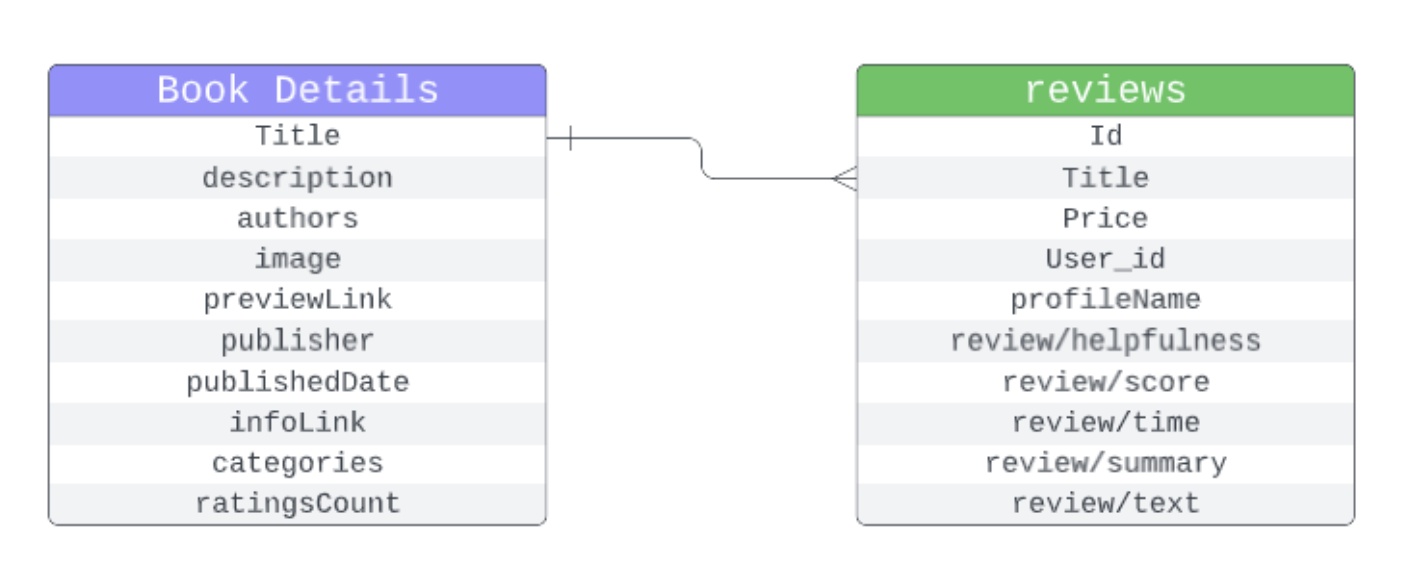

In [77]:

print("Books Dataset Info:")
print(books_df.info())


Books Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB
None


In [78]:
books_df.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [79]:
print("Ratings Dataset Info:")
print(ratings_df.info())


Ratings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  object 
 1   Title               object 
 2   Price               float64
 3   User_id             object 
 4   profileName         object 
 5   review/helpfulness  object 
 6   review/score        float64
 7   review/time         int64  
 8   review/summary      object 
 9   review/text         object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB
None


In [80]:
ratings_df.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [55]:
def analyze_null_values(df, dataset_name="Dataset"):
    """
    Analyze and display null values in each column of a dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        dataset_name (str): Name of dataset for display purposes

    Returns:
        pd.Series: Percentage of null values per column
    """
    # Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    # Create a summary dataframe
    null_summary = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Count': df.isnull().sum(),
        'Null %': null_percentages,
        'Data Type': df.dtypes
    })

    # Sort by null percentage descending
    null_summary = null_summary.sort_values('Null %', ascending=False)

    print(f"\n{dataset_name} Null Value Analysis:")
    print("-" * 80)
    print(null_summary)
    print("-" * 80)
    print(f"Total rows in dataset: {len(df):,}")

    return null_summary


In [ ]:
# Analyze both datasets
ratings_nulls = analyze_null_values(ratings_df, "Ratings")
books_nulls = analyze_null_values(books_df, "Books")


Ratings Null Value Analysis:
--------------------------------------------------------------------------------
                                Column  Null Count  Null % Data Type
Price                            Price     2518829   83.96   float64
User_id                        User_id      561787   18.73    object
profileName                profileName      561905   18.73    object
Title                            Title         208    0.01    object
review/summary          review/summary         407    0.01    object
Id                                  Id           0    0.00    object
review/helpfulness  review/helpfulness           0    0.00    object
review/score              review/score           0    0.00   float64
review/time                review/time           0    0.00     int64
review/text                review/text           8    0.00    object
--------------------------------------------------------------------------------
Total rows in dataset: 3,000,000

Books Null Valu

We notice that there a lot of records which are missing important description info. We can potentially get this from the book web link or another source.

In [ ]:
# Find example rows where infoLink is not null but description is null
example_rows = books_df[
    books_df['infoLink'].notna() &
    books_df['description'].isnull()
].head()

print("Sample rows with missing description but present infoLink:")
print("-" * 80)
for _, row in example_rows.iterrows():
    print("\nTitle:", row['Title'])
    print("Authors:", row['authors'])
    print("InfoLink:", row['infoLink'])
    print("Published Date:", row['publishedDate'])
    print("Categories:", row['categories'])
    print("-" * 40)

Sample rows with missing description but present infoLink:
--------------------------------------------------------------------------------

Title: Its Only Art If Its Well Hung!
Authors: ['Julie Strain']
InfoLink: http://books.google.nl/books?id=DykPAAAACAAJ&dq=Its+Only+Art+If+Its+Well+Hung!&hl=&source=gbs_api
Published Date: 1996
Categories: ['Comics & Graphic Novels']
----------------------------------------

Title: Nation Dance: Religion, Identity and Cultural Difference in the Caribbean
Authors: ['Edward Long']
InfoLink: http://books.google.nl/books?id=399SPgAACAAJ&dq=Nation+Dance:+Religion,+Identity+and+Cultural+Difference+in+the+Caribbean&hl=&source=gbs_api
Published Date: 2003-03-01
Categories: nan
----------------------------------------

Title: The Overbury affair (Avon)
Authors: ['Miriam Allen De Ford']
InfoLink: http://books.google.nl/books?id=mHLTngEACAAJ&dq=The+Overbury+affair+(Avon)&hl=&source=gbs_api
Published Date: 1960
Categories: nan
---------------------------------

## SECTION 1.2: RATINGS BY USER

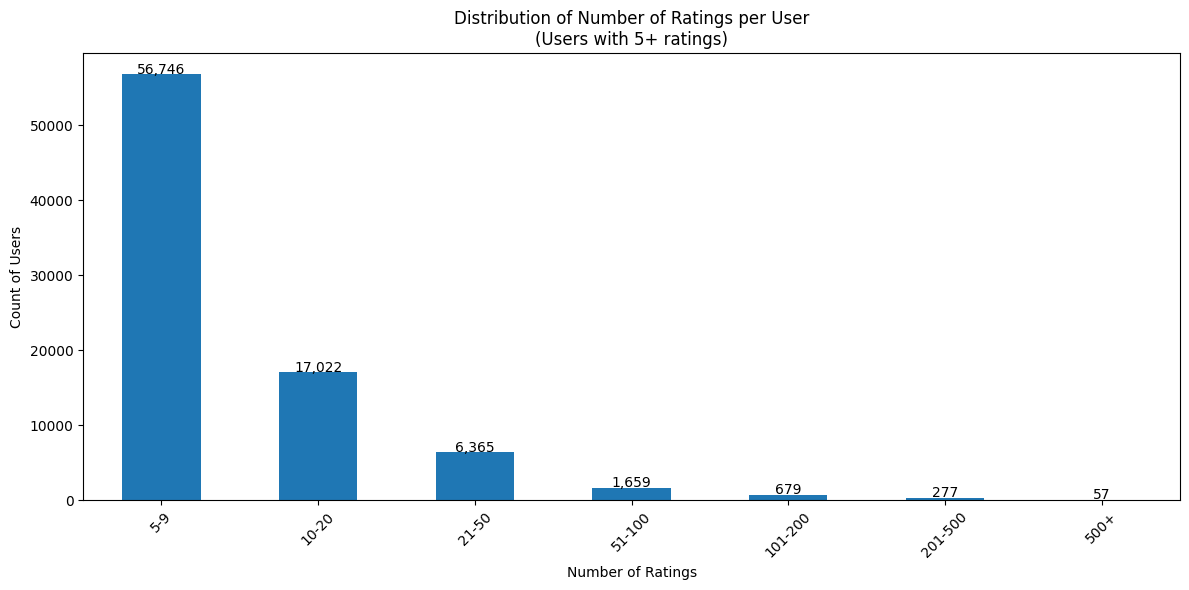

In [ ]:
# Count ratings per user
user_rating_counts = ratings_df['User_id'].value_counts()

# Filter for users with at least 5 ratings for the plot
plot_users_counts = user_rating_counts[user_rating_counts >= 5]

# Create custom bins for the plot
bins = [4, 10, 20, 50, 100, 200, 500, float('inf')]
labels = ['5-9', '10-20', '21-50', '51-100', '101-200', '201-500', '500+']

# Bin the data
binned_counts = pd.cut(plot_users_counts, bins=bins, labels=labels)
binned_counts = binned_counts.value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
binned_counts.plot(kind='bar')
plt.title('Distribution of Number of Ratings per User\n(Users with 5+ ratings)')
plt.xlabel('Number of Ratings')
plt.ylabel('Count of Users')
plt.xticks(rotation=45)

for i, v in enumerate(binned_counts):
   plt.text(i, v + 100, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
# Print statistics for ALL users
print("\nDistribution of all users by rating count:")
print(f"Users with 1-4 ratings: {len(user_rating_counts[user_rating_counts < 5]):,} ({len(user_rating_counts[user_rating_counts < 5])/len(user_rating_counts)*100:.1f}%)")
for label, count in binned_counts.items():
   print(f"{label}: {count:,} users ({count/len(user_rating_counts)*100:.1f}%)")

print(f"\nTotal number of users: {len(user_rating_counts):,}")
print(f"Average ratings per user: {user_rating_counts.mean():.1f}")
print(f"Median ratings per user: {user_rating_counts.median():.1f}")


Distribution of all users by rating count:
Users with 1-4 ratings: 926,167 (91.8%)
5-9: 56,746 users (5.6%)
10-20: 17,022 users (1.7%)
21-50: 6,365 users (0.6%)
51-100: 1,659 users (0.2%)
101-200: 679 users (0.1%)
201-500: 277 users (0.0%)
500+: 57 users (0.0%)

Total number of users: 1,008,972
Average ratings per user: 2.4
Median ratings per user: 1.0


Most users have less than five ratings.

In [ ]:
def analyze_ratings_distribution():
   """
   Analyze the distribution of user ratings
   """
   ratings = ratings_df['review/score']

   # Basic statistics
   print("Basic Rating Statistics:")
   print("-" * 80)
   print(ratings.describe())

   # Value counts
   print("\nRating Distribution:")
   print("-" * 80)
   counts = ratings.value_counts().sort_index()
   total = len(ratings)

   for rating, count in counts.items():
       percentage = (count/total) * 100
       print(f"Rating {rating:.1f}: {count:,} reviews ({percentage:.1f}%)")

   # Calculate mean and median
   print(f"\nMean rating: {ratings.mean():.2f}")
   print(f"Median rating: {ratings.median():.2f}")

   # Show how many unique values there are
   print(f"\nNumber of unique rating values: {len(ratings.unique())}")
   if len(ratings.unique()) > 5:
       print("\nUnique rating values:")
       print(sorted(ratings.unique()))

analyze_ratings_distribution()

Basic Rating Statistics:
--------------------------------------------------------------------------------
count    3.000000e+06
mean     4.215289e+00
std      1.203054e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64

Rating Distribution:
--------------------------------------------------------------------------------
Rating 1.0: 201,688 reviews (6.7%)
Rating 2.0: 151,058 reviews (5.0%)
Rating 3.0: 254,295 reviews (8.5%)
Rating 4.0: 585,616 reviews (19.5%)
Rating 5.0: 1,807,343 reviews (60.2%)

Mean rating: 4.22
Median rating: 5.00

Number of unique rating values: 5


In [ ]:
# Merge the dataframes
merged_df = ratings_df.merge(books_df, on='Title', how='left', indicator=True)

# Keep only matched records and drop the merge indicator (although all records match)
merged_df = merged_df[merged_df['_merge'] == 'both'].drop('_merge', axis=1)

print("\nColumns in merged dataset:")
print(merged_df.columns.tolist())


Columns in merged dataset:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']


In [ ]:
print(merged_df.shape)

(3000000, 19)


Looking at duplicates

In [ ]:
# Identify duplicate rows based on the combination of 'user_id', 'title', and 'authors'
duplicate_rows = merged_df[merged_df.duplicated(subset=['User_id', 'Title', 'Authors'], keep=False)]

duplicate_rows = duplicate_rows.sort_values(by=['User_id', 'Title', 'Authors'])

print(len(duplicate_rows))

## SECTION 1.3: REVIEW LENGTH

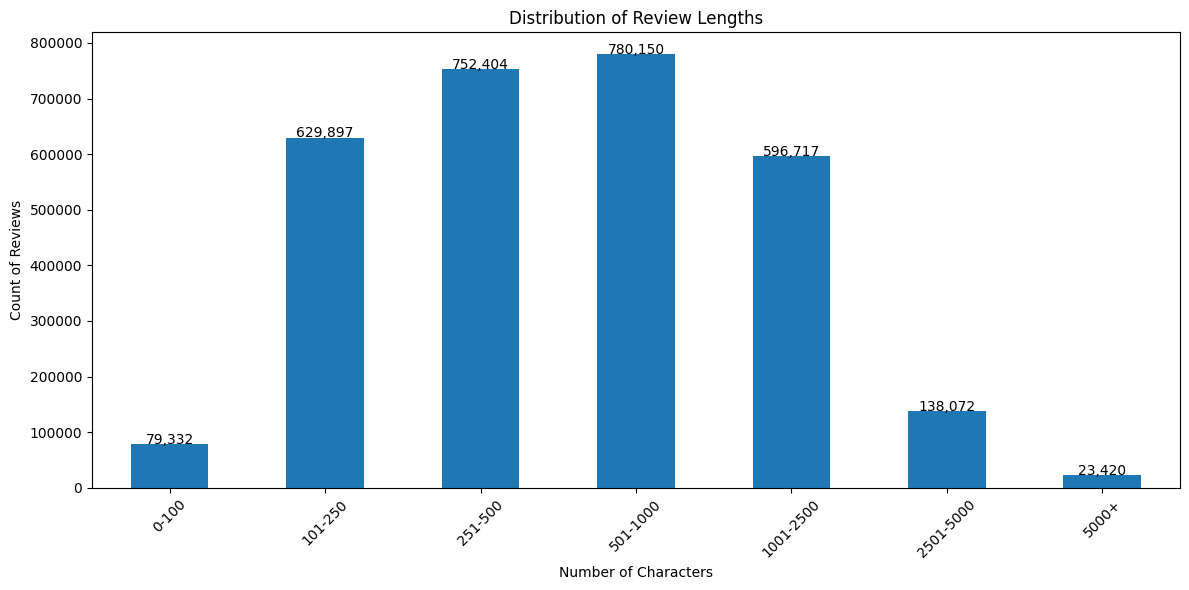

In [ ]:
# Calculate length of each review
merged_df['review_length'] = merged_df['review/text'].str.len()

# Custom bins for review lengths
bins = [0, 100, 250, 500, 1000, 2500, 5000, float('inf')]
labels = ['0-100', '101-250', '251-500', '501-1000', '1001-2500', '2501-5000', '5000+']

binned_lengths = pd.cut(merged_df['review_length'], bins=bins, labels=labels)
binned_counts = binned_lengths.value_counts().sort_index()

# Bar plot
plt.figure(figsize=(12, 6))
binned_counts.plot(kind='bar')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)

for i, v in enumerate(binned_counts):
   plt.text(i, v + 100, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Print statistics
print("\nReview Length Statistics:")
print(f"Mean length: {merged_df['review_length'].mean():.0f} characters")
print(f"Median length: {merged_df['review_length'].median():.0f} characters")
print(f"Min length: {merged_df['review_length'].min():.0f} characters")
print(f"Max length: {merged_df['review_length'].max():.0f} characters")

print("\nDistribution across bins:")
for label, count in binned_counts.items():
   percentage = (count/len(merged_df)) * 100
   print(f"{label}: {count:,} reviews ({percentage:.1f}%)")


Review Length Statistics:
Mean length: 823 characters
Median length: 516 characters
Min length: 1 characters
Max length: 32576 characters

Distribution across bins:
0-100: 79,332 reviews (2.6%)
101-250: 629,897 reviews (21.0%)
251-500: 752,404 reviews (25.1%)
501-1000: 780,150 reviews (26.0%)
1001-2500: 596,717 reviews (19.9%)
2501-5000: 138,072 reviews (4.6%)
5000+: 23,420 reviews (0.8%)


## SECTION 1.4: BOOK CATEGORIES

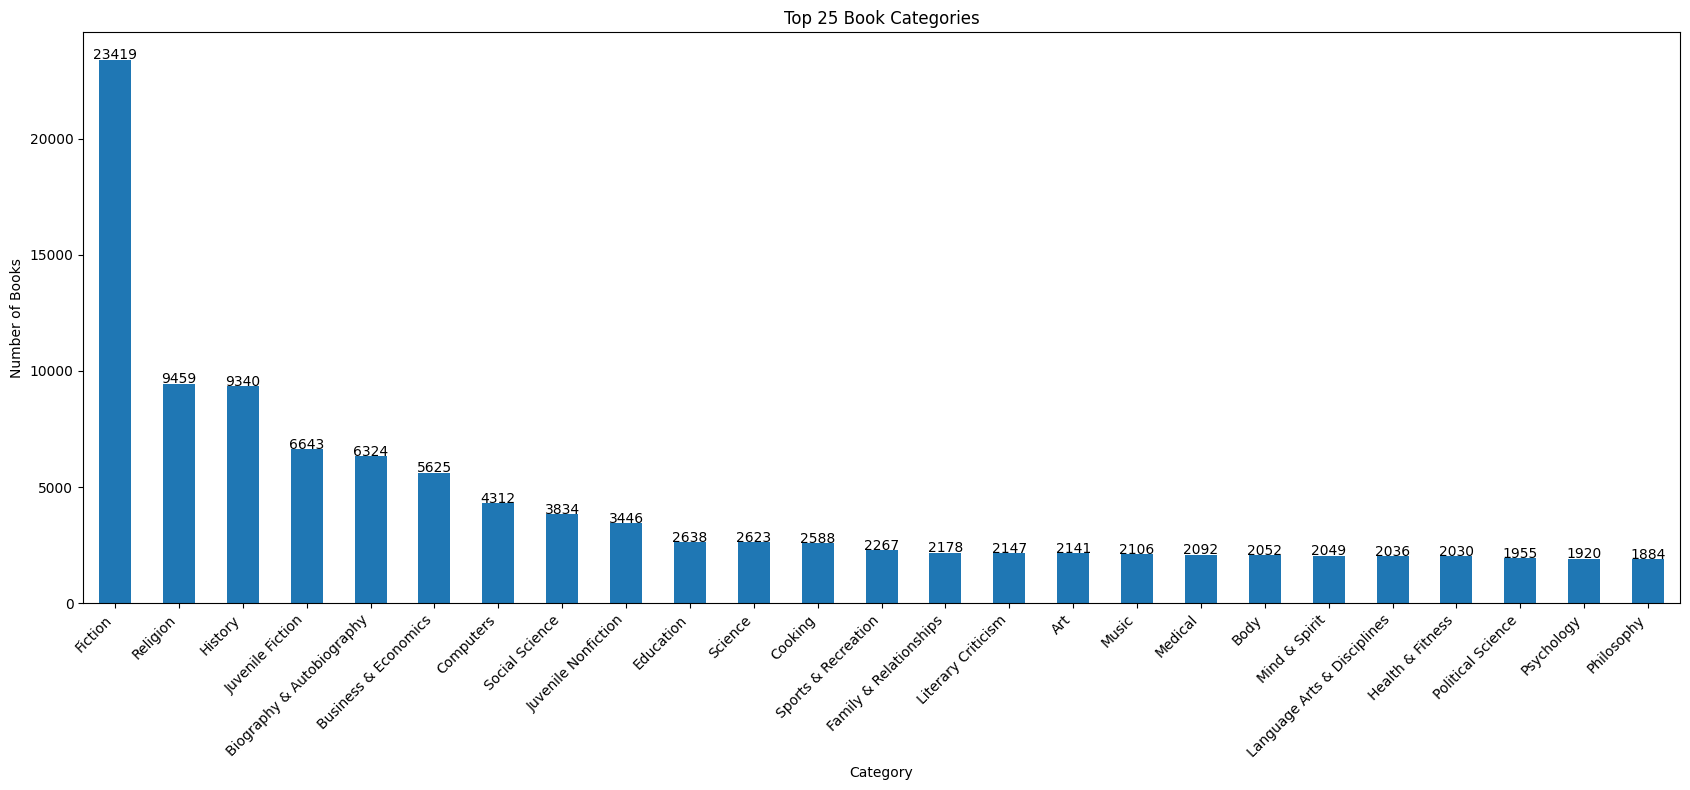

In [ ]:
# Count how many books have no categories at all
missing_categories = books_df['categories'].isna().sum()

# Extract and flatten category lists from non-missing rows
categories_series = books_df['categories'].dropna()

def extract_categories(cat_string):
    try:
        # Remove brackets and single quotes, split by comma b/c some books have more than one category
        cats = cat_string.strip('[]').replace("'", "").split(',')
        return [c.strip() for c in cats]
    except:
        return []

all_categories = []
for cats_str in categories_series:
    all_categories.extend(extract_categories(cats_str))

category_counts = pd.Series(all_categories).value_counts()

# Plot top 25 categories (arbitrary choice)
plt.figure(figsize=(17, 8))
category_counts.head(25).plot(kind='bar')
plt.title('Top 25 Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(category_counts.head(25)):
    plt.text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()


In [ ]:
top_n = 25
top_n_cats = set(category_counts.head(top_n).index)

# Create a parsed_categories column for all rows
books_df['parsed_categories'] = books_df['categories'].apply(
    lambda x: extract_categories(x) if pd.notna(x) else []
)

# A boolean indicating whether a book has at least one of the top N categories
books_df['has_top_category'] = books_df['parsed_categories'].apply(
    lambda cats: len(set(cats) & top_n_cats) > 0
)

num_books_outside_top_n = (~books_df['has_top_category']).sum()
pct_books_outside_top_n = num_books_outside_top_n / len(books_df) * 100

# Print statistics
print(f"\nTotal number of books: {len(books_df)}")
print(f"Books missing categories: {missing_categories} ({missing_categories/len(books_df)*100:.1f}%)")
print(f"Number of unique categories overall: {len(category_counts)}")
print(f"Books with no top-{top_n} categories: {num_books_outside_top_n} "
      f"({pct_books_outside_top_n:.1f}%)\n")

print(f"Top {top_n} categories by frequency:")
for cat, count in category_counts.head(top_n).items():
    print(f"  {cat}: {count} books")


Total number of books: 212404
Books missing categories: 41199 (19.4%)
Number of unique categories overall: 10990
Books with no top-25 categories: 107345 (50.5%)

Top 25 categories by frequency:
  Fiction: 23419 books
  Religion: 9459 books
  History: 9340 books
  Juvenile Fiction: 6643 books
  Biography & Autobiography: 6324 books
  Business & Economics: 5625 books
  Computers: 4312 books
  Social Science: 3834 books
  Juvenile Nonfiction: 3446 books
  Education: 2638 books
  Science: 2623 books
  Cooking: 2588 books
  Sports & Recreation: 2267 books
  Family & Relationships: 2178 books
  Literary Criticism: 2147 books
  Art: 2141 books
  Music: 2106 books
  Medical: 2092 books
  Body: 2052 books
  Mind & Spirit: 2049 books
  Language Arts & Disciplines: 2036 books
  Health & Fitness: 2030 books
  Political Science: 1955 books
  Psychology: 1920 books
  Philosophy: 1884 books


In [ ]:
# Extract categories for each row as a list:
def extract_categories(cat_string):
    if pd.isna(cat_string):
        return []
    try:
        return [c.strip().strip("'") for c in cat_string.strip('[]').split(',')]
    except:
        return []

books_df['parsed_categories'] = books_df['categories'].apply(extract_categories)

# 2. Top 50 categories by frequency
top_50_categories = set(category_counts.head(50).index)

# 3. For each book, check if it has at least one top category
def has_top_category(cats):
    # 'cats' is a list of categories for the book
    # return True if there's an intersection with top_50_categories
    return len(set(cats) & top_50_categories) > 0

books_df['has_top_category'] = books_df['parsed_categories'].apply(has_top_category)

# 4. Calculate how many books do *not* have any top category
num_books_outside_top_50 = (~books_df['has_top_category']).sum()
pct_books_outside_top_50 = num_books_outside_top_50 / len(books_df) * 100

# 5. Print summary
print(f"Total number of books: {len(books_df)}")
print(f"Books with no top-50 categories: {num_books_outside_top_50} ({pct_books_outside_top_50:.1f}%)")
print(f"Number of unique categories overall: {len(category_counts)}\n")

print("Top 50 categories:")
for cat, count in category_counts.head(50).items():
    print(f"{cat}: {count} books")


Total number of books: 212404
Books with no top-50 categories: 81967 (38.6%)
Number of unique categories overall: 10990

Top 50 categories:
Fiction: 23419 books
Religion: 9459 books
History: 9340 books
Juvenile Fiction: 6643 books
Biography & Autobiography: 6324 books
Business & Economics: 5625 books
Computers: 4312 books
Social Science: 3834 books
Juvenile Nonfiction: 3446 books
Education: 2638 books
Science: 2623 books
Cooking: 2588 books
Sports & Recreation: 2267 books
Family & Relationships: 2178 books
Literary Criticism: 2147 books
Art: 2141 books
Music: 2106 books
Medical: 2092 books
Body: 2052 books
Mind & Spirit: 2049 books
Language Arts & Disciplines: 2036 books
Health & Fitness: 2030 books
Political Science: 1955 books
Psychology: 1920 books
Philosophy: 1884 books
Travel: 1812 books
Technology & Engineering: 1662 books
Self-Help: 1519 books
Poetry: 1504 books
Foreign Language Study: 1404 books
Crafts & Hobbies: 1350 books
Performing Arts: 1305 books
Reference: 1277 books
Math

Let's see how many categories books have.

In [ ]:
# Count categories per book
def count_categories(cat_string):
   if pd.isna(cat_string):
       return 0
   try:
       # Remove brackets and split by comma
       cats = cat_string.strip('[]').replace("'", "").split(',')
       return len([c.strip() for c in cats])
   except:
       return 0

books_df['category_count'] = books_df['categories'].apply(count_categories)

# Print statistics
print("\nCategory count statistics:")
print(f"Books with no categories: {len(books_df[books_df['category_count'] == 0])}")
print("\nDistribution of number of categories per book:")
print(books_df['category_count'].value_counts().sort_index())


Category count statistics:
Books with no categories: 41199

Distribution of number of categories per book:
category_count
0     41199
1    165385
2      5418
3       325
4        52
5        25
Name: count, dtype: int64


In [ ]:
# Let's look at some books with exactly 2 categories
print("Books with exactly 2 categories:")
two_categories = books_df[books_df['categories'].apply(lambda x:
   len(str(x).strip('[]').replace("'", "").split(',')) == 2 if pd.notna(x) else False)]

# Display title and categories for a sample
print("\nSample of books with 2 categories:")
sample = two_categories[['Title', 'categories']].head(10)
for _, row in sample.iterrows():
   print(f"\nTitle: {row['Title']}")
   print(f"Categories: {row['categories']}")

Books with exactly 2 categories:

Sample of books with 2 categories:

Title: History of Magic and the Occult
Categories: ['Body, Mind & Spirit']

Title: Little One, Maid of Israel
Categories: ['Bible stories, English']

Title: Hidden History of the Kovno Ghetto
Categories: ['Holocaust, Jewish (1939-1945)']

Title: Death Dream
Categories: ['Body, Mind & Spirit']

Title: Screenwriter: Words Become Pictures/304506
Categories: ['Illumination of books and manuscripts, Dutch']

Title: Engendering Culture: Manhood and Womanhood In New Deal Public Art and Theater
Categories: ['Arts, American']

Title: Lost Cities of Africa and Arabia (The Lost City Series)
Categories: ['Body, Mind & Spirit']

Title: A wonder book for girls and boys
Categories: ['Mythology, Classical']

Title: Witches' Way, The
Categories: ['Body, Mind & Spirit']

Title: The Tao of I Ching: Way to Divination
Categories: ['Body, Mind & Spirit']


# SECTION 2: DATA CLEANING

## SECTION 2.1: LOADING AND MERGING

We first load our book dataframe and rating dataframe

In [7]:
# Load the data
books_df = load_data('books_data.csv')
ratings_df = load_data('books_rating.csv')


Loading cached data from books_data.pkl
Loading cached data from books_rating.pkl


In [8]:
print(books_df.shape)
print(ratings_df.shape)

(212404, 10)
(3000000, 10)


Merge the dataframes

In [9]:
# Merge the dataframes
merged_df = ratings_df.merge(books_df, on='Title', how='left', indicator=True)

# Keep only matched records and drop the merge indicator (although all records match)
merged_df = merged_df[merged_df['_merge'] == 'both'].drop('_merge', axis=1)

print("\nColumns in merged dataset:")
print(merged_df.columns.tolist())

print(merged_df.shape)



Columns in merged dataset:
['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness', 'review/score', 'review/time', 'review/summary', 'review/text', 'description', 'authors', 'image', 'previewLink', 'publisher', 'publishedDate', 'infoLink', 'categories', 'ratingsCount']
(3000000, 19)


## SECTION 2.2: RENAMING AND REFORMATTING, DROPPING DUPLICATES

In [10]:
def standardize_column_names(df):
    """
    Standardizes column names by:
    1. Adding underscores between lowercase and uppercase letters.
    2. Converting all column names to lowercase.
    3. Replacing slashes ('/') with underscores ('_').

    Args:
        df (pd.DataFrame): The input DataFrame whose columns will be standardized.

    Returns:
        pd.DataFrame: The DataFrame with standardized column names.
    """
    original_columns = df.columns.tolist()

    # Add underscores between lowercase and uppercase letters
    df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)

    # Convert column names to lowercase
    df.columns = df.columns.str.lower()

    # Replace slashes ('/') with underscores ('_')
    df.columns = df.columns.str.replace('/', '_')

    # Log changes
    updated_columns = df.columns.tolist()
    print("Column name changes:")
    for old, new in zip(original_columns, updated_columns):
        if old != new:
            print(f"  - '{old}' renamed to '{new}'")

    return df


In [11]:
# Apply the function
merged_df = standardize_column_names(merged_df)

# View the updated DataFrame
print("\nUpdated DataFrame columns:")
print(merged_df.columns)


Column name changes:
  - 'Id' renamed to 'id'
  - 'Title' renamed to 'title'
  - 'Price' renamed to 'price'
  - 'User_id' renamed to 'user_id'
  - 'profileName' renamed to 'profile_name'
  - 'review/helpfulness' renamed to 'review_helpfulness'
  - 'review/score' renamed to 'review_score'
  - 'review/time' renamed to 'review_time'
  - 'review/summary' renamed to 'review_summary'
  - 'review/text' renamed to 'review_text'
  - 'previewLink' renamed to 'preview_link'
  - 'publishedDate' renamed to 'published_date'
  - 'infoLink' renamed to 'info_link'
  - 'ratingsCount' renamed to 'ratings_count'

Updated DataFrame columns:
Index(['id', 'title', 'price', 'user_id', 'profile_name', 'review_helpfulness',
       'review_score', 'review_time', 'review_summary', 'review_text',
       'description', 'authors', 'image', 'preview_link', 'publisher',
       'published_date', 'info_link', 'categories', 'ratings_count'],
      dtype='object')


Fixing the review date field

In [12]:
from datetime import datetime

def convert_unix_to_date(df, column_name):
    """
    Converts a column with Unix time (Epoch time) to a human-readable date format (YYYY-MM-DD).
    """

    # Convert Unix time to date (only YYYY-MM-DD)
    df[column_name] = pd.to_datetime(df[column_name], unit='s').dt.date

    return df


In [13]:
# Apply the function to the 'review/time' column
merged_df = convert_unix_to_date(merged_df, 'review_time')

# Check the result
print(merged_df[['review_time']].head())


  review_time
0  1999-10-23
1  2004-09-21
2  2004-03-09
3  2004-07-25
4  2005-02-10


Fix helpfulness field

In [14]:
def extract_helpfulness_number(helpfulness_str):
    parts = str(helpfulness_str).split('/')
    return int(parts[0]) if parts[0].isdigit() else 0


In [15]:
# Apply the function to 'review_helpfulness' using .loc
merged_df.loc[:, 'review_helpfulness'] = merged_df['review_helpfulness'].apply(extract_helpfulness_number)


Taking care of duplicates

In [16]:
def drop_bad_rows(df, subset_cols):
    """
    Cleans the dataset by:
    1. Dropping rows with no description.
    2. Dropping duplicate rows based on a subset of columns.

    Args:
        df (pd.DataFrame): The input DataFrame.
        subset_cols (list): The columns to use for identifying duplicates.

    Returns:
        pd.DataFrame: A cleaned DataFrame with no missing descriptions and no duplicate rows.
    """
    # Step 1: Drop rows with no description
    initial_count = len(df)
    df = df[df['description'].notna()]
    desc_dropped = initial_count - len(df)
    print(f"Step 1: Dropped {desc_dropped} rows with no description. Remaining rows: {len(df)}")

    # Step 2: Drop duplicate rows based on subset_cols
    duplicate_rows = df[df.duplicated(subset=subset_cols, keep=False)]
    print(f"Step 2: Found {len(duplicate_rows)} duplicate rows based on columns {subset_cols}.")

    df = df.drop_duplicates(subset=subset_cols, keep='first')
    duplicates_dropped = initial_count - len(df) - desc_dropped
    print(f"Step 2: Dropped {duplicates_dropped} duplicate rows. Remaining rows: {len(df)}")

    return df


In [17]:
# Define the columns to identify duplicates
subset_columns = ['user_id', 'title', 'authors']

# Apply the combined cleaning function
merged_df = drop_bad_rows(merged_df, subset_columns)


Step 1: Dropped 640225 rows with no description. Remaining rows: 2359775
Step 2: Found 835085 duplicate rows based on columns ['user_id', 'title', 'authors'].
Step 2: Dropped 653250 duplicate rows. Remaining rows: 1706525


In [18]:
def extract_publication_year(date_str):
    """
    Extract publication year from various date formats.

    Args:
        date_str: Date in various formats (year, MM/DD/YY, YYYY-MM, etc.)

    Returns:
        int: Four-digit year or None if invalid/missing
    """
    if pd.isna(date_str):
        return None

    date_str = str(date_str).strip()

    try:
        # If it's just a year (4 digits)
        if date_str.isdigit() and len(date_str) == 4:
            year = int(date_str)
            # Basic validation
            if 1500 <= year <= 2025:
                return year

        # If it's MM/DD/YY format
        elif '/' in date_str:
            # Split the date
            parts = date_str.split('/')
            if len(parts) == 3:
                year = int(parts[2])
                return year

        # If it's YYYY-MM format
        elif '-' in date_str:
            year = int(date_str.split('-')[0])
            if 1500 <= year <= 2025:
                return year

    except (ValueError, IndexError):
        return None

    return None


In [19]:
merged_df.loc[:, "publish_year"] = (
    merged_df["published_date"]
    .apply(extract_publication_year)
    .astype("Int64")
)


In [20]:
merged_df.shape

(1706525, 20)

In [21]:
merged_df.head()

,id,title,price,user_id,profile_name,review_helpfulness,review_score,review_time,review_summary,review_text,description,authors,image,preview_link,publisher,published_date,info_link,categories,ratings_count,publish_year
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10,5.0,2004-03-09,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3,4.0,2005-02-10,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005
5,0826414346,Dr. Seuss: American Icon,NaN,A2F6NONFUDB6UK,Malvin,2,4.0,2005-09-20,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,2005


## SECTION 2.3: CONSOLIDATING BOOK INFO

Function to standardize titles of books that are the same.

In [22]:
def standardize_title(title):
    """
    Standardize book titles by:
    1. Converting to lowercase
    2. Removing edition/format information in parentheses
    3. Removing special characters
    4. Removing extra whitespace
    """
    if pd.isna(title):
        return title

    import re

    # Convert to lowercase
    title = title.lower()

    # Remove parenthetical text that typically indicates editions/formats
    # Catches patterns like (Penguin Classics), (Spanish Edition), etc.
    title = re.sub(r'\([^)]*edition[^)]*\)', '', title)
    title = re.sub(r'\([^)]*classics[^)]*\)', '', title)
    title = re.sub(r'\([^)]*series[^)]*\)', '', title)
    title = re.sub(r'\([^)]*volume[^)]*\)', '', title)

    # Remove remaining parentheses content
    title = re.sub(r'\([^)]*\)', '', title)
    title = re.sub(r'\[[^]]*\]', '', title)

    # Remove special characters but keep basic punctuation and ampersands
    title = re.sub(r'[^\w\s&,-]', '', title)

    # Remove extra whitespace
    title = ' '.join(title.split())

    return title.strip()


Book consolidation and helper function.

In [23]:
def get_primary_author(authors):
    """Extract primary author from authors list"""
    if pd.isna(authors):
        return None
    try:
        # Convert string representation of list to actual list and get first author
        # Remove brackets and quotes, then split on comma
        authors_list = authors.strip('[]').replace("'", "").split(',')
        return authors_list[0].strip()
    except:
        return authors


In [24]:
def consolidate_book_versions(df):
    """
    For each (standard_title, primary_author), find the 'canonical' Title
    (the one with the most reviews). Then pull the book columns from
    that canonical Title into all rows having the same standard_title
    and primary_author.
    """
    # Standardized title and primary author
    df['standard_title'] = df['title'].apply(standardize_title)
    df['primary_author'] = df['authors'].apply(get_primary_author)

    # Count reviews of each distinct (standard_title, primary_author, Title)
    group_counts = (
        df.groupby(['standard_title', 'primary_author', 'title'])
          .size()
          .rename('review_count')
          .reset_index()
    )

    # 3) For each (standard_title, primary_author), find Title with the max review_count
    idx = group_counts.groupby(['standard_title', 'primary_author'])['review_count'].idxmax()
    canonical_versions = group_counts.loc[idx].reset_index(drop=True)
    # canonical_versions now has: standard_title, primary_author, Title, review_count

    # 4) Get the "book metadata columns" so we can grab this from canonical row
    book_cols = [
        'description',
        'image',
        'preview_link',
        'publisher',
        'published_date',
        'info_link',
        'categories',
        'ratings_count',
    ]

    canonical_info = (
        df.drop_duplicates(subset='title')
          .loc[:, ['title'] + book_cols]
    )

    #    Merge the canonical versions with the canonical_info
    #    so each row in canonical_versions has *its* Title’s book metadata.
    canonical_versions = canonical_versions.merge(canonical_info, on='title', how='left')

    result = df.merge(
        canonical_versions.drop(columns=['title', 'review_count']),
        on=['standard_title', 'primary_author'],
        how='left',
        suffixes=('', '_canonical')
    )

    for col in book_cols:
        result[col] = result[f'{col}_canonical']
        result.drop(columns=[f'{col}_canonical'], inplace=True)

    return result


Testing this out with the book 'Emma' by Jane Austen, which has a number of similar versions.

In [25]:
# Get all Emma versions and their review counts before consolidation
emma_versions = merged_df[
    merged_df['title'].str.contains('Emma', case=False, regex=True) &
    merged_df['authors'].str.contains('Jane Austen', case=False, na=False)
]

print("Emma Versions Before Consolidation:")
print("-" * 80)

# Count reviews and show descriptions for each version
version_info = (emma_versions.groupby(['title', 'publisher', 'published_date', 'description'])
              .size()
              .reset_index(name='review_count'))
# Sort by review count
version_info = version_info.sort_values('review_count', ascending=False)

# Set display options to show all rows and full text
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Before consolidation:")
for _, row in version_info.iterrows():
    print(f"\nTitle: {row['title']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Published: {row['published_date']}")
    print(f"Review Count: {row['review_count']}")
    print(f"Description: {row['description']}")
    print("-" * 40)


Emma Versions Before Consolidation:
--------------------------------------------------------------------------------
Before consolidation:

Title: Emma
Publisher: Penguin Classics
Published: 2015
Review Count: 386
Description: The culmination of Jane Austen's genius, a sparkling comedy of love and marriage--now in a stunning 200th-anniversary Penguin Classics Deluxe Edition Now a major motion picture starring Anya Taylor-Joy Beautiful, clever, rich--and single--Emma Woodhouse is perfectly content with her life and sees no need for either love or marriage. Nothing, however, delights her more than interfering in the romantic lives of others. But when she ignores the warnings of her good friend Mr. Knightley and attempts to arrange a suitable match for her protégée, Harriet Smith, her carefully laid plans soon unravel and have consequences that she never expected. With its imperfect but charming heroine and its witty and subtle exploration of relationships, Emma is often seen as Jane Aust

In [26]:
# Now consolidate and check the results
consolidated_df = consolidate_book_versions(merged_df)

print("\nAfter Consolidation:")
print("-" * 80)

emma_consolidated = consolidated_df[
    consolidated_df['title'].str.contains('Emma', case=False, regex=True) &
    consolidated_df['authors'].str.contains('Jane Austen', case=False, na=False)
]

# Check consolidated versions
consolidated_info = (emma_consolidated.groupby(['standard_title', 'publisher', 'published_date', 'description'])
                    .size()
                    .reset_index(name='review_count'))
consolidated_info = consolidated_info.sort_values('review_count', ascending=False)

for _, row in consolidated_info.iterrows():
    print(f"\nStandardized Title: {row['standard_title']}")
    print(f"Publisher: {row['publisher']}")
    print(f"Published: {row['published_date']}")
    print(f"Review Count: {row['review_count']}")
    print(f"Description: {row['description']}")
    print("-" * 40)

# Reset display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')


After Consolidation:
--------------------------------------------------------------------------------

Standardized Title: emma
Publisher: Penguin Classics
Published: 2015
Review Count: 3446
Description: The culmination of Jane Austen's genius, a sparkling comedy of love and marriage--now in a stunning 200th-anniversary Penguin Classics Deluxe Edition Now a major motion picture starring Anya Taylor-Joy Beautiful, clever, rich--and single--Emma Woodhouse is perfectly content with her life and sees no need for either love or marriage. Nothing, however, delights her more than interfering in the romantic lives of others. But when she ignores the warnings of her good friend Mr. Knightley and attempts to arrange a suitable match for her protégée, Harriet Smith, her carefully laid plans soon unravel and have consequences that she never expected. With its imperfect but charming heroine and its witty and subtle exploration of relationships, Emma is often seen as Jane Austen's most flawless wor

Perform consolidation function on full data.

In [27]:
consolidated_df = consolidate_book_versions(merged_df)

In [28]:
consolidated_df.shape

(1706525, 22)

## SECTION 2.4: FILTERING DOWN BY REVIEWS PER USER

In [29]:
def filter_by_user_reviews(df, min_reviews=10):
    """
    Filter dataframe to keep only users with at least min_reviews reviews.

    Args:
        df: DataFrame containing user reviews
        min_reviews: Minimum number of reviews required per user

    Returns:
        DataFrame containing only users with sufficient reviews
    """
    # Count reviews per user
    user_review_counts = df['user_id'].value_counts()

    # Get users who meet the threshold
    qualified_users = user_review_counts[user_review_counts >= min_reviews].index

    # Filter the dataframe
    filtered_df = df[df['user_id'].isin(qualified_users)]

    # Calculate statistics
    original_num_users = df['user_id'].nunique()
    remaining_num_users = filtered_df['user_id'].nunique()
    original_num_reviews = len(df)
    remaining_num_reviews = len(filtered_df)
    original_num_titles = df['title'].nunique()
    remaining_num_titles = filtered_df['title'].nunique()
    original_num_authors = df['authors'].nunique()
    remaining_num_authors = filtered_df['authors'].nunique()

    # Print statistics
    print(f"Original number of users: {original_num_users:,}")
    print(f"Users with {min_reviews}+ reviews: {remaining_num_users:,}")
    print(f"Original number of reviews: {original_num_reviews:,}")
    print(f"Remaining reviews: {remaining_num_reviews:,}")
    print(f"Original number of unique titles: {original_num_titles:,}")
    print(f"Remaining unique titles: {remaining_num_titles:,}")
    print(f"Original number of unique authors: {original_num_authors:,}")
    print(f"Remaining unique authors: {remaining_num_authors:,}")

    return filtered_df


In [30]:
filtered_df = filter_by_user_reviews(consolidated_df,10)


Original number of users: 850,181
Users with 10+ reviews: 14,402
Original number of reviews: 1,706,525
Remaining reviews: 397,950
Original number of unique titles: 143,962
Remaining unique titles: 73,239
Original number of unique authors: 101,368
Remaining unique authors: 50,757


## SECTION 2.4: IMPUTING MISSING CATEGORIES

In [74]:
import pandas as pd
import numpy as np

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict


In [75]:
def extract_categories(cat_string):
    """
    Safely parse categories from string that may look like: "['Fiction','Romance']" etc.
    """
    if pd.isna(cat_string):
        return []
    try:
        # Remove brackets and split by comma
        cats = cat_string.strip('[]').replace("'", "").split(',')
        return [c.strip() for c in cats if c.strip() != ""]
    except:
        return []

def create_category_embeddings(filtered_df, all_embeddings, min_examples=20):
    """
    Create average embeddings for each category by:
      1. Exploding categories into long-form (one row per (book, category)).
      2. Summing & counting embeddings by category.
      3. Returning a dictionary of { category_name: embedding_vector }.

    filtered_df must have:
      - 'parsed_categories' (list of str)
      - 'embedding_idx' (int index into all_embeddings)
    """
    # Only keep rows with at least one category and a valid embedding_idx
    valid_books = filtered_df[
        (filtered_df['parsed_categories'].notna()) &
        (filtered_df['parsed_categories'].str.len() > 0) &
        (filtered_df['embedding_idx'].notna())
    ].copy()

    # Explode to long form
    exploded_df = valid_books.explode('parsed_categories')

    # Group by category to collect embedding indices
    cat2idx_series = exploded_df.groupby('parsed_categories')['embedding_idx'].apply(list)

    sum_dict = {}
    count_dict = {}

    if len(cat2idx_series) > 0:
        first_cat = cat2idx_series.index[0]
        first_idx_list = cat2idx_series.iloc[0]
        if len(first_idx_list) > 0:
            vector_dim = all_embeddings[first_idx_list[0]].shape[0]
        else:
            vector_dim = all_embeddings.shape[1]
    else:
        # No valid categories at all
        return {}

    # Accumulate sums and counts
    for cat, idx_list in cat2idx_series.items():
        # Grab embeddings for these indices
        arr_stack = all_embeddings[idx_list, :]
        sum_dict[cat] = arr_stack.sum(axis=0)
        count_dict[cat] = arr_stack.shape[0]

    # Create final centroids
    category_centroids = {}
    for cat, total_vec in sum_dict.items():
        cnt = count_dict[cat]
        if cnt >= min_examples:
            category_centroids[cat] = total_vec / cnt

    return category_centroids

def assign_categories(filtered_df, category_centroids, all_embeddings, threshold=0.6, top_k=1):
    """
    Assign categories to books that are missing categories, by:
      1. Computing cosine similarity to each centroid using all_embeddings.
      2. Assigning categories above threshold.
      3. If none pass threshold, assign top_k categories.

    filtered_df must have:
      - 'categories'
      - 'embedding_idx'
    """
    # Identify uncategorized books that have a valid embedding_idx
    mask = filtered_df['categories'].isna() & (filtered_df['embedding_idx'].notna())
    uncategorized_books = filtered_df[mask].copy()
    if uncategorized_books.empty:
        return pd.Series([None]*0, index=[])

    # Build matrix of category centroids
    all_cats = list(category_centroids.keys())
    cat_matrix = np.stack([category_centroids[c] for c in all_cats], axis=0)

    # Extract embedding rows for the uncategorized books
    idx_array = uncategorized_books['embedding_idx'].values
    desc_embeddings = all_embeddings[idx_array, :]

    # Compute pairwise similarities
    cos_sims = cosine_similarity(desc_embeddings, cat_matrix)

    assigned_categories = []
    for i in range(cos_sims.shape[0]):
        row_sims = cos_sims[i]
        # Find all categories above threshold
        cat_indices = np.where(row_sims >= threshold)[0]

        if len(cat_indices) > 0:
            assigned = [all_cats[j] for j in cat_indices]
        else:
            # If none exceed threshold, pick top_k
            top_indices = np.argsort(-row_sims)[:top_k]
            assigned = [all_cats[j] for j in top_indices]

        assigned_categories.append(assigned)

    return pd.Series(assigned_categories, index=uncategorized_books.index)


In [76]:
#model = SentenceTransformer('all-mpnet-base-v2', device='cuda')
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda') # smaller model

In [77]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Current device:", torch.cuda.current_device())
print("Device name:", torch.cuda.get_device_name(0))

CUDA available: True
Current device: 0
Device name: NVIDIA A100-SXM4-40GB


In [78]:
# Parse categories into a new column
filtered_df['parsed_categories'] = filtered_df['categories'].apply(extract_categories)

# Create column for embedding indices
filtered_df['embedding_idx'] = np.arange(len(filtered_df))

descriptions = filtered_df['description'].fillna("").tolist()
all_embeddings = model.encode(
    descriptions,
    batch_size=2048,
    show_progress_bar=True,
    convert_to_numpy=True
)


Batches:   0%|          | 0/193 [00:00<?, ?it/s]

In [79]:
# Build category centroids using the external embedding array
category_centroids = create_category_embeddings(filtered_df, all_embeddings, min_examples=25)

# Assign categories to missing rows
assigned_series = assign_categories(filtered_df, category_centroids, all_embeddings, threshold=0.6, top_k=1)


In [80]:
# Store results in a new column
filtered_df['assigned_categories'] = None
filtered_df.loc[assigned_series.index, 'assigned_categories'] = assigned_series


In [81]:
filtered_df = filtered_df[filtered_df['description'].notna()]

# Filter rows where 'categories' is NaN and 'assigned_categories' is not NaN
mask = (filtered_df['categories'].isna()) & (filtered_df['assigned_categories'].notna())
missing_then_imputed = filtered_df[mask].copy()

# Drop duplicate titles to ensure each book is printed only once
unique_books = missing_then_imputed.drop_duplicates(subset='title')

# Sample 50 rows from the unique books
sample_rows = unique_books.head(10)

# Iterate over the sampled rows and print details
for idx, row in sample_rows.iterrows():
    title = row.get('title', 'N/A')
    description = row.get('description', 'N/A')
    assigned_cat = row.get('assigned_categories', None)

    print("==== Example Book ====")
    print(f"Title:       {title}")
    print(f"Description: {description}")
    print(f"Assigned:    {assigned_cat}\n")


==== Example Book ====
Title:       Dealing With Disappointment: Helping Kids Cope When Things Don't Go Their Way
Description: Why Dragons So Angry? Despite our best efforts, reality doesn't always meet our expectations. There is no need to be upset or mad. * Anger can be a positive emotion when it helps kids work through issues or problems* Help kids learn how to manage their anger in safe and healthy ways* Teach your kids to deal with disappointment * Being angry doesn't make you bad Get this book and learn how to train your angry ! A must have book for children and parents to teach kids about emotions and anger management. Fun, cute and entertaining, this playful book will teach kids how to handle when things don't go their way. Did you know that anger isn't totally bad like we have always been taught? Children from my observation often experience strong and sudden bursts of emotion. Teaching children how to manage their emotions in a healthy way is an essential skill they need to h

In [96]:
filtered_df['assigned_categories'] = filtered_df['assigned_categories'].where(
    filtered_df['assigned_categories'].notna(), filtered_df['categories']
)


##  SECTION 2.5 CATEGORY DIMENSIONALITY REDUCTION


We have over 10k unique categories and a distribution with a long tail. We can reduce this number by clustering similar categories...

In [156]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [157]:
def extract_categories(cat_string):
    """
    Extract categories from a string or return the input if it's already a list.
    """
    if isinstance(cat_string, list):
        # If it's already a list, return it as-is
        return cat_string
    if pd.isna(cat_string):
        return []
    try:
        # Remove brackets and split by commas for string representations of lists
        cats = cat_string.strip('[]').replace("'", "").split(',')
        return [c.strip() for c in cats if c.strip() != ""]
    except:
        return []

# Fix: Handle lists directly in assigned_categories
all_cats = []
for cats in filtered_df['assigned_categories'].dropna():
    all_cats.extend(extract_categories(cats))

# Count category frequencies
category_counts = pd.Series(all_cats).value_counts()
unique_categories = list(category_counts.index)

print(f"Number of unique categories: {len(unique_categories)}")



Number of unique categories: 2975


We can use the [all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) sentence transformer model, which maps sentences & paragraphs to a 768 dimensional dense vector space.

In [158]:
# Create embeddings

#model = SentenceTransformer('all-MiniLM-L6-v2')
model = SentenceTransformer('all-mpnet-base-v2')

In [159]:
category_embeddings = model.encode(unique_categories)

We can reduce the number of dimensions using PCA. We're telling PCA to keep enough components to explain 95% of the variance in the data, rather than specifying an exact number of dimensions.

In [160]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
reduced_embeddings = pca.fit_transform(category_embeddings)
print(f"Reduced dimensions: {reduced_embeddings.shape[1]}")

Reduced dimensions: 301


Instead of picking how many clusters we want in advance, the algorithm figures it out by seeing when merging two clusters would exceed that distance.

In [161]:
distance_threshold = 3.5

In [162]:
# Perform clustering with distance threshold
clustering = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=distance_threshold,
    linkage='ward'
)
cluster_labels = clustering.fit_predict(reduced_embeddings)

In [163]:
# Build cluster summaries using most frequent category
clusters_summary = []
for cluster_idx in range(cluster_labels.max() + 1):
    # Indices belonging to this cluster
    cluster_indices = np.where(cluster_labels == cluster_idx)[0]
    # Actual category names
    cluster_cats = [unique_categories[i] for i in cluster_indices]

    # Sort cluster categories by descending frequency
    cluster_cats_sorted_by_freq = sorted(
        cluster_cats,
        key=lambda cat: category_counts[cat],
        reverse=True
    )
    # Most frequent category
    most_frequent_cat = cluster_cats_sorted_by_freq[0] if cluster_cats_sorted_by_freq else None

    clusters_summary.append({
        'cluster_id': cluster_idx,
        'label': most_frequent_cat,
        'size': len(cluster_cats),
        'categories_sorted_by_freq': cluster_cats_sorted_by_freq
    })


Note that the clusters below have a label that just shows the most frequent category in that cluster. This label is NOT meant to indicate a "true" summary name for the cluster. We can tackle this later, if needed.

In [164]:
# Sort clusters by size (descending) and display results
clusters_summary = sorted(clusters_summary, key=lambda x: x['size'], reverse=True)

# Show the top 5 categories by frequency for each cluster
top_n = 5
for cluster in clusters_summary:
    top_categories = cluster['categories_sorted_by_freq'][:top_n]
    print(f"\nCluster {cluster['cluster_id']} - Label: {cluster['label']}")
    print(f"Size: {cluster['size']} categories")
    print(f"Sample categories (top {top_n} by freq): {top_categories}")



Cluster 0 - Label: Philosophy
Size: 181 categories
Sample categories (top 5 by freq): ['Philosophy', 'Mind & Spirit', 'Psychology', 'Adultery', 'Design']

Cluster 32 - Label: Reference
Size: 153 categories
Sample categories (top 5 by freq): ['Reference', 'House & Home', 'Copyright', 'Canon (Literarature)', 'Christmas stories']

Cluster 19 - Label: Bildungsromans
Size: 135 categories
Sample categories (top 5 by freq): ['Bildungsromans', 'Ahab', 'Campion', 'Marple', 'Cadfael']

Cluster 2 - Label: Fiction
Size: 126 categories
Sample categories (top 5 by freq): ['Fiction', 'Juvenile Fiction', 'Young Adult Fiction', 'Juvenile Nonfiction', 'FICTION']

Cluster 7 - Label: Pets
Size: 121 categories
Sample categories (top 5 by freq): ['Pets', 'Animals', 'Predation (Biology)', 'Cats', 'Animal experimentation']

Cluster 1 - Label: Pirates
Size: 117 categories
Sample categories (top 5 by freq): ['Pirates', 'Sea stories', 'Admirals', 'Military art and science', 'Boats and boating']

Cluster 5 - Lab

Assigning clusters to records in the dataframe

In [165]:
# Map cluster labels to descriptive names
cluster_labels_to_names = {}
for cluster in clusters_summary:
    cluster_id = cluster['cluster_id']
    top_categories = cluster['categories_sorted_by_freq'][:5]
    cluster_name = f"Cluster {cluster_id}: {top_categories}"
    cluster_labels_to_names[cluster_id] = cluster_name

# Create a mapping from unique categories to cluster names
category_to_cluster_name = {
    unique_category: cluster_labels_to_names[cluster_label]
    for unique_category, cluster_label in zip(unique_categories, cluster_labels)
}


In [166]:
# Assign each record to a cluster in the DataFrame
def assign_cluster(categories):
    if pd.isna(categories):
        return None  # Handle missing categories
    parsed_categories = extract_categories(categories)
    cluster_names = {category_to_cluster_name.get(cat, None) for cat in parsed_categories}
    cluster_names.discard(None)  #
    return list(cluster_names)[0] if cluster_names else None


View some of the clusters

In [167]:
filtered_df['category_cluster'] = filtered_df['categories'].apply(assign_cluster)


In [168]:
# Randomly sort the rows
shuffled_df = filtered_df.sample(frac=1, random_state=50)

In [169]:
shuffled_df[['title', 'assigned_categories', 'category_cluster']].head(20)


,title,assigned_categories,category_cluster
1193941,a dram of poison,['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
1653247,One Mississippi: A Novel,['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
552784,Wuthering Heights,[Audiobooks],None
233285,Moby Dick,['Young Adult Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
1298205,Logan's Run,['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
398176,Jane Eyre: Complete and Unabridged (Puffin Cla...,['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
628041,Forever Amber (The Greates Historical Novels),['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
1343115,How To Cook Everything: Simple Recipes for Gre...,['Cooking'],"Cluster 4: ['Cooking', 'Gardening', 'Cookery',..."
164051,A Clockwork Orange,['Juvenile Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."
79544,Inspector Imanishi Investigates (Soho Crime),['Fiction'],"Cluster 2: ['Fiction', 'Juvenile Fiction', 'Yo..."


## SECTION 2.6: EXPORT CLEAN DATA

In [170]:
def analyze_null_values(df, dataset_name="Dataset"):
    """
    Analyze and display null values in each column of a dataframe.

    Args:
        df (pd.DataFrame): Input dataframe
        dataset_name (str): Name of dataset for display purposes

    Returns:
        pd.Series: Percentage of null values per column
    """
    # Calculate null percentages
    null_percentages = (df.isnull().sum() / len(df) * 100).round(2)

    # Create a summary dataframe
    null_summary = pd.DataFrame({
        'Column': null_percentages.index,
        'Null Count': df.isnull().sum(),
        'Null %': null_percentages,
        'Data Type': df.dtypes
    })

    # Sort by null percentage descending
    null_summary = null_summary.sort_values('Null %', ascending=False)

    print(f"\n{dataset_name} Null Value Analysis:")
    print("-" * 80)
    print(null_summary)
    print("-" * 80)
    print(f"Total rows in dataset: {len(df):,}")

    return null_summary


In [171]:
filtered_nulls = analyze_null_values(filtered_df, "Reviews")


Reviews Null Value Analysis:
--------------------------------------------------------------------------------
                                  Column  Null Count  Null % Data Type
price                              price      337803   85.52   float64
ratings_count              ratings_count      133717   33.85   float64
publisher                      publisher       30443    7.71    object
category_cluster        category_cluster       15677    3.97    object
categories                    categories       15677    3.97    object
image                              image       11573    2.93    object
publish_year                publish_year        1532    0.39     Int64
published_date            published_date        1188    0.30    object
review_summary            review_summary          35    0.01    object
title                              title           0    0.00    object
review_text                  review_text           0    0.00    object
review_time                  review_t

In [173]:
num_unique_users = filtered_df["user_id"].nunique()
print("Number of unique user IDs:", num_unique_users)

Number of unique user IDs: 14402


Dropping columns we don't need

In [174]:
drop_columns = ['price','ratings_count','publisher','image','published_date','info_link','preview_link','profile_name']

filtered_df = filtered_df.drop(columns=drop_columns)


Re-ordering columns

In [175]:
filtered_df.drop(columns=['assigned_categories'], inplace=True, errors='ignore')

new_col_order = [
    'id',
    'user_id',
    'title',
    'standard_title',
    'authors',
    'primary_author',
    'categories',
    'parsed_categories',
    'category_cluster',
    'publish_year',
    'review_helpfulness',
    'review_score',
    'review_time',
    'review_summary',
    'review_text',
    'description',
    'embedding_idx'
]

filtered_df = filtered_df.reindex(columns=new_col_order)


Looking at the final dataframe

In [176]:
filtered_df.head()

,id,user_id,title,standard_title,authors,primary_author,categories,parsed_categories,category_cluster,publish_year,review_helpfulness,review_score,review_time,review_summary,review_text,description,embedding_idx
0,0826414346,A30TK6U7DNS82R,Dr. Seuss: American Icon,dr seuss american icon,['Philip Nel'],Philip Nel,['Biography & Autobiography'],[Biography & Autobiography],"Cluster 5: ['History', 'Biography & Autobiogra...",2005,10,5.0,2004-09-21,Really Enjoyed It,I don't care much for Dr. Seuss but after read...,Philip Nel takes a fascinating look into the k...,0
2,0826414346,A2MVUWT453QH61,Dr. Seuss: American Icon,dr seuss american icon,['Philip Nel'],Philip Nel,['Biography & Autobiography'],[Biography & Autobiography],"Cluster 5: ['History', 'Biography & Autobiogra...",2005,7,4.0,2004-07-25,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D...",Philip Nel takes a fascinating look into the k...,1
4,0826414346,A2F6NONFUDB6UK,Dr. Seuss: American Icon,dr seuss american icon,['Philip Nel'],Philip Nel,['Biography & Autobiography'],[Biography & Autobiography],"Cluster 5: ['History', 'Biography & Autobiogra...",2005,2,4.0,2005-09-20,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ...",Philip Nel takes a fascinating look into the k...,2
5,0826414346,A14OJS0VWMOSWO,Dr. Seuss: American Icon,dr seuss american icon,['Philip Nel'],Philip Nel,['Biography & Autobiography'],[Biography & Autobiography],"Cluster 5: ['History', 'Biography & Autobiogra...",2005,3,5.0,2004-11-11,A memorably excellent survey of Dr. Seuss' man...,Theodor Seuss Giesel was best known as 'Dr. Se...,Philip Nel takes a fascinating look into the k...,3
10,0829814000,A373VVEU6Z9M0N,Wonderful Worship in Smaller Churches,wonderful worship in smaller churches,['David R. Ray'],David R. Ray,['Religion'],[Religion],"Cluster 16: ['Religion', 'Christian life', 'Ch...",2000,1,5.0,2010-12-08,Small Churches CAN Have Wonderful Worship,Many small churches feel like they can not hav...,This resource includes twelve principles in un...,4


Exporting the dataframe as a .pkl file

In [177]:
filtered_df.to_pickle("books_data_clean.pkl")